# Getting the data from NBA API

In [1]:
import requests

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

In [2]:
pip install nba_api

In [3]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats

In [4]:
from nba_api.stats.static import players
allActiveP = players.get_active_players()
allActiveP

[{'id': 1630173,
  'full_name': 'Precious Achiuwa',
  'first_name': 'Precious',
  'last_name': 'Achiuwa',
  'is_active': True},
 {'id': 203500,
  'full_name': 'Steven Adams',
  'first_name': 'Steven',
  'last_name': 'Adams',
  'is_active': True},
 {'id': 1628389,
  'full_name': 'Bam Adebayo',
  'first_name': 'Bam',
  'last_name': 'Adebayo',
  'is_active': True},
 {'id': 1630534,
  'full_name': 'Ochai Agbaji',
  'first_name': 'Ochai',
  'last_name': 'Agbaji',
  'is_active': True},
 {'id': 1630583,
  'full_name': 'Santi Aldama',
  'first_name': 'Santi',
  'last_name': 'Aldama',
  'is_active': True},
 {'id': 1629638,
  'full_name': 'Nickeil Alexander-Walker',
  'first_name': 'Nickeil',
  'last_name': 'Alexander-Walker',
  'is_active': True},
 {'id': 1628960,
  'full_name': 'Grayson Allen',
  'first_name': 'Grayson',
  'last_name': 'Allen',
  'is_active': True},
 {'id': 1628386,
  'full_name': 'Jarrett Allen',
  'first_name': 'Jarrett',
  'last_name': 'Allen',
  'is_active': True},
 {'id':

In [5]:
#number of active players
playerID = []
for i in range(0, len(allActiveP)):
    playerID.append(allActiveP[i]['id'])
len(playerID)

582

In [6]:
allPlayerDf = pd.DataFrame()
for i in range(0,len(playerID)):
    info = commonplayerinfo.CommonPlayerInfo(player_id=playerID[i])
    info = info.get_data_frames()[0]
    allPlayerDf = pd.concat([allPlayerDf, info])
    time.sleep(0.6)
allPlayerDf

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,precious_achiuwa,2020,2022,N,Y,Y,2020,1,20,N
0,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,steven_adams,2013,2022,N,Y,Y,2013,1,12,N
0,1628389,Bam,Adebayo,Bam Adebayo,"Adebayo, Bam",B. Adebayo,bam-adebayo,1997-07-18T00:00:00,Kentucky,USA,...,bam_adebayo,2017,2022,N,Y,Y,2017,1,14,N
0,1630534,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20T00:00:00,Kansas,USA,...,ochai_agbaji,2022,2022,Y,Y,Y,2022,1,14,N
0,1630583,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10T00:00:00,Loyola-Maryland,Spain,...,santi_aldama,2021,2022,Y,Y,Y,2021,1,30,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,201152,Thaddeus,Young,Thaddeus Young,"Young, Thaddeus",T. Young,thaddeus-young,1988-06-21T00:00:00,Georgia Tech,USA,...,thaddeus_young,2007,2022,N,Y,Y,2007,1,12,N
0,1629027,Trae,Young,Trae Young,"Young, Trae",T. Young,trae-young,1998-09-19T00:00:00,Oklahoma,USA,...,trae_young,2018,2022,N,Y,Y,2018,1,5,N
0,1630209,Omer,Yurtseven,Omer Yurtseven,"Yurtseven, Omer",O. Yurtseven,omer-yurtseven,1998-06-19T00:00:00,Georgetown,Turkey,...,tmp_omer_yurtseven,2020,2022,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
0,203469,Cody,Zeller,Cody Zeller,"Zeller, Cody",C. Zeller,cody-zeller,1992-10-05T00:00:00,Indiana,USA,...,cody_zeller,2013,2022,N,Y,Y,2013,1,4,N


In [14]:
allPlayerStatsDf = pd.DataFrame()
for i in range(0,len(playerID)):
    careerstats_player = playercareerstats.PlayerCareerStats(player_id=playerID[i])
    df_player_games = careerstats_player.get_data_frames()[0]
    time.sleep(0.6)
    allPlayerStatsDf = pd.concat([allPlayerStatsDf, df_player_games])
allPlayerStatsDf

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,2020-21,00,1610612748,MIA,21.0,61,4,737.0,124,...,0.509,73,135,208,29,20,28,43,91,304
1,1630173,2021-22,00,1610612761,TOR,22.0,73,28,1725.0,265,...,0.595,146,327,473,82,37,41,84,151,664
2,1630173,2022-23,00,1610612761,TOR,23.0,55,12,1141.0,196,...,0.702,100,228,328,50,31,30,59,102,508
0,203500,2013-14,00,1610612760,OKC,20.0,81,20,1197.0,93,...,0.581,142,190,332,43,40,57,71,203,265
1,203500,2014-15,00,1610612760,OKC,21.0,70,67,1771.0,217,...,0.502,199,324,523,66,38,86,99,222,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1627826,2018-19,00,0,TOT,22.0,59,37,1039.0,212,...,0.802,115,247,362,63,14,51,70,137,525
5,1627826,2019-20,00,1610612746,LAC,23.0,72,70,1326.0,236,...,0.747,197,346,543,82,16,66,61,168,596
6,1627826,2020-21,00,1610612746,LAC,24.0,72,33,1609.0,257,...,0.789,189,330,519,90,24,62,81,187,650
7,1627826,2021-22,00,1610612746,LAC,25.0,76,76,1852.0,310,...,0.727,217,427,644,120,36,77,114,203,785


In [15]:
allPlayerDf = allPlayerDf.rename(columns = {'DISPLAY_FIRST_LAST': 'NAME', 'PERSON_ID': 'PLAYER_ID'})
allPlayerDf = allPlayerDf.reset_index(drop=True)

mergedDf = pd.merge(allPlayerDf, allPlayerStatsDf, on="PLAYER_ID", how="left")
mergedDf

,PLAYER_ID,FIRST_NAME,LAST_NAME,NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.509,73,135,208,29,20,28,43,91,304
1,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.595,146,327,473,82,37,41,84,151,664
2,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.702,100,228,328,50,31,30,59,102,508
3,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,0.581,142,190,332,43,40,57,71,203,265
4,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,0.502,199,324,523,66,38,86,99,222,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.802,115,247,362,63,14,51,70,137,525
3579,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.747,197,346,543,82,16,66,61,168,596
3580,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.789,189,330,519,90,24,62,81,187,650
3581,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.727,217,427,644,120,36,77,114,203,785


### Export to csv file

In [ ]:
#mergedDf.to_csv('nbadata.csv')

### Import the csv file

In [17]:
mergedDf = pd.read_csv('nbadata.csv', index_col=0)
mergedDf

,PLAYER_ID,FIRST_NAME,LAST_NAME,NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.509,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0
1,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.595,146.0,327.0,473.0,82.0,37.0,41.0,84.0,151.0,664.0
2,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,0.702,100.0,228.0,328.0,50.0,31.0,30.0,59.0,102.0,508.0
3,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0
4,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,0.502,199.0,324.0,523.0,66.0,38.0,86.0,99.0,222.0,537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.802,115.0,247.0,362.0,63.0,14.0,51.0,70.0,137.0,525.0
3579,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.747,197.0,346.0,543.0,82.0,16.0,66.0,61.0,168.0,596.0
3580,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.789,189.0,330.0,519.0,90.0,24.0,62.0,81.0,187.0,650.0
3581,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,0.727,217.0,427.0,644.0,120.0,36.0,77.0,114.0,203.0,785.0


# Data Cleaning

In [18]:
mergedDf['PTS_G'] = mergedDf['PTS'] / mergedDf['GP']
mergedDf['AST_G'] = mergedDf['AST'] / mergedDf['GP']
mergedDf['REB_G'] = mergedDf['REB'] / mergedDf['GP']
mergedDf['OREB_G'] = mergedDf['OREB'] / mergedDf['GP']
mergedDf['DREB_G'] = mergedDf['DREB'] / mergedDf['GP']
mergedDf['STL_G'] = mergedDf['STL'] / mergedDf['GP']
mergedDf['BLK_G'] = mergedDf['BLK'] / mergedDf['GP']
mergedDf['TOV_G'] = mergedDf['TOV'] / mergedDf['GP']
mergedDf['PF_G'] = mergedDf['PF'] / mergedDf['GP']
mergedDf['MIN_G'] = mergedDf['MIN'] / mergedDf['GP']
mergedDf

,PLAYER_ID,FIRST_NAME,LAST_NAME,NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PTS_G,AST_G,REB_G,OREB_G,DREB_G,STL_G,BLK_G,TOV_G,PF_G,MIN_G
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,4.983607,0.475410,3.409836,1.196721,2.213115,0.327869,0.459016,0.704918,1.491803,12.081967
1,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,9.095890,1.123288,6.479452,2.000000,4.479452,0.506849,0.561644,1.150685,2.068493,23.630137
2,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,9.236364,0.909091,5.963636,1.818182,4.145455,0.563636,0.545455,1.072727,1.854545,20.745455
3,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,3.271605,0.530864,4.098765,1.753086,2.345679,0.493827,0.703704,0.876543,2.506173,14.777778
4,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,7.671429,0.942857,7.471429,2.842857,4.628571,0.542857,1.228571,1.414286,3.171429,25.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,8.898305,1.067797,6.135593,1.949153,4.186441,0.237288,0.864407,1.186441,2.322034,17.610169
3579,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,8.277778,1.138889,7.541667,2.736111,4.805556,0.222222,0.916667,0.847222,2.333333,18.416667
3580,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,9.027778,1.250000,7.208333,2.625000,4.583333,0.333333,0.861111,1.125000,2.597222,22.347222
3581,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,10.328947,1.578947,8.473684,2.855263,5.618421,0.473684,1.013158,1.500000,2.671053,24.368421


In [19]:
positions = mergedDf[['POSITION', 'GP', 'PTS_G', 'AST_G', 'REB_G', 'MIN_G']]
positions = positions.groupby(['POSITION']).agg('mean')
positions

,GP,PTS_G,AST_G,REB_G,MIN_G
POSITION,,,,,
Center,51.139466,9.119593,1.253997,6.685804,20.501888
Center-Forward,46.664634,9.534933,1.413707,5.822670,20.060942
Forward,50.588295,10.318781,1.739343,4.424842,22.573988
Forward-Center,51.233813,10.247767,1.547168,5.716280,21.263415
Forward-Guard,52.210884,10.815617,2.036372,4.094953,24.396187
Guard,50.145690,11.294191,3.329239,2.960325,23.563997
Guard-Forward,51.042296,9.201040,1.967362,3.039348,22.025901


In [20]:
mergedDf['FGM_G'] = mergedDf['FGM'] / mergedDf['GP']
mergedDf['FGA_G'] = mergedDf['FGA'] / mergedDf['GP']
mergedDf['FG3M_G'] = mergedDf['FG3M'] / mergedDf['GP']
mergedDf['FG3A_G'] = mergedDf['FG3A'] / mergedDf['GP']
mergedDf['FTM_G'] = mergedDf['FTM'] / mergedDf['GP']
mergedDf['FTA_G'] = mergedDf['FTA'] / mergedDf['GP']

data = mergedDf[['PLAYER_ID', 'NAME', 'POSITION', 'HEIGHT', 'WEIGHT', 'GP', 'GS', 'FGM_G', 'FGA_G', 'FG_PCT',
                 'FG3M_G', 'FG3A_G', 'FG3_PCT', 'FTM_G', 'FTA_G', 'FT_PCT', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G',
                 'PTS_G', 'AST_G', 'REB_G', 'OREB_G', 'DREB_G', 'MIN_G']]

data = data.groupby(['PLAYER_ID', 'NAME', 'POSITION', 'HEIGHT'], as_index=False).agg('mean')
data = data[data.GP >= 10]
data = data[data.MIN_G >= 10]
data = data.reset_index(drop=True)

data[['Feet', 'Inch']] = data.HEIGHT.str.split("-", expand=True)
data['Feet'] = pd.to_numeric(data['Feet'])
data['Inch'] = pd.to_numeric(data['Inch'])
data['HEIGHT_CM'] = (data['Feet'] * 12 + data['Inch']) * 2.54
data['WEIGHT_KG'] = data['WEIGHT'] * 0.45359237
data = data[['PLAYER_ID', 'NAME', 'POSITION', 'HEIGHT_CM', 'WEIGHT_KG', 'GP', 'GS', 'FGM_G', 'FGA_G', 'FG_PCT',
                 'FG3M_G', 'FG3A_G', 'FG3_PCT', 'FTM_G', 'FTA_G', 'FT_PCT', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G',
                 'PTS_G', 'AST_G', 'REB_G', 'OREB_G', 'DREB_G', 'MIN_G']]
data

,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,...,STL_G,BLK_G,TOV_G,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G
0,2544,LeBron James,Forward,205.74,113.398093,71.050000,70.950000,9.980721,19.747850,0.506600,...,1.512278,0.748412,3.501938,1.823289,27.202618,7.343041,7.546615,1.159673,6.386942,37.830215
1,2617,Udonis Haslem,Forward,200.66,106.594207,43.950000,25.050000,2.371726,4.933578,0.471550,...,0.350600,0.216531,0.692718,1.894813,5.825214,0.606783,5.093397,1.317556,3.775841,18.870190
2,2738,Andre Iguodala,Guard-Forward,198.12,97.522360,64.789474,41.263158,3.682906,7.999843,0.459947,...,1.324870,0.530730,1.700549,1.706569,10.177261,3.995871,4.643953,0.860977,3.782976,30.091291
3,101108,Chris Paul,Guard,182.88,79.378665,67.444444,67.444444,6.310947,13.392481,0.470167,...,2.078656,0.164830,2.372486,2.406774,17.848758,9.442347,4.487565,0.604172,3.883393,34.354979
4,200752,Rudy Gay,Forward-Guard,203.20,113.398093,60.380952,44.095238,6.103477,13.714946,0.443333,...,1.159273,0.728541,2.149292,2.268746,16.209973,2.163346,5.726123,1.304343,4.421779,31.340741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1631222,Jake LaRavia,Forward,200.66,106.594207,35.000000,0.000000,1.057143,2.714286,0.389000,...,0.342857,0.114286,0.514286,1.400000,3.000000,0.600000,1.800000,0.542857,1.257143,11.828571
460,1631223,David Roddy,Forward,193.04,115.666054,70.000000,4.000000,2.571429,6.000000,0.429000,...,0.414286,0.271429,0.814286,1.528571,6.657143,0.842857,2.757143,0.714286,2.042857,17.985714
461,1631230,Dominick Barlow,Forward,205.74,97.522360,28.000000,0.000000,1.642857,3.071429,0.535000,...,0.357143,0.678571,0.535714,2.000000,3.928571,0.857143,3.642857,1.642857,2.000000,14.571429
462,1631288,Jamal Cain,Forward,198.12,86.636143,18.000000,0.000000,2.055556,3.666667,0.561000,...,0.611111,0.055556,0.333333,1.166667,5.444444,0.666667,2.888889,0.833333,2.055556,13.333333


In [21]:
for col in data.columns:
    print(col)

PLAYER_ID
NAME
POSITION
HEIGHT_CM
WEIGHT_KG
GP
GS
FGM_G
FGA_G
FG_PCT
FG3M_G
FG3A_G
FG3_PCT
FTM_G
FTA_G
FT_PCT
STL_G
BLK_G
TOV_G
PF_G
PTS_G
AST_G
REB_G
OREB_G
DREB_G
MIN_G


In [22]:
grouped = data[['PLAYER_ID', 'NAME', 'POSITION', 'HEIGHT_CM', 'WEIGHT_KG', 'GP', 'PTS_G', 'AST_G', 'REB_G', 'MIN_G']]
#I narrowed down the original 7 positions of the data set to 5 positions
grouped['POSITION'] = grouped['POSITION'].replace({'Center-Forward': 'Forward-Center', 'Guard-Forward': 'Forward-Guard'})
grouped

C:\Users\gelias006\AppData\Local\Temp\ipykernel_10376\2097286386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['POSITION'] = grouped['POSITION'].replace({'Center-Forward': 'Forward-Center', 'Guard-Forward': 'Forward-Guard'})


,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G,REB_G,MIN_G
0,2544,LeBron James,Forward,205.74,113.398093,71.050000,27.202618,7.343041,7.546615,37.830215
1,2617,Udonis Haslem,Forward,200.66,106.594207,43.950000,5.825214,0.606783,5.093397,18.870190
2,2738,Andre Iguodala,Forward-Guard,198.12,97.522360,64.789474,10.177261,3.995871,4.643953,30.091291
3,101108,Chris Paul,Guard,182.88,79.378665,67.444444,17.848758,9.442347,4.487565,34.354979
4,200752,Rudy Gay,Forward-Guard,203.20,113.398093,60.380952,16.209973,2.163346,5.726123,31.340741
...,...,...,...,...,...,...,...,...,...,...
459,1631222,Jake LaRavia,Forward,200.66,106.594207,35.000000,3.000000,0.600000,1.800000,11.828571
460,1631223,David Roddy,Forward,193.04,115.666054,70.000000,6.657143,0.842857,2.757143,17.985714
461,1631230,Dominick Barlow,Forward,205.74,97.522360,28.000000,3.928571,0.857143,3.642857,14.571429
462,1631288,Jamal Cain,Forward,198.12,86.636143,18.000000,5.444444,0.666667,2.888889,13.333333


In [23]:
center = grouped[grouped.POSITION == 'Center']
#center

In [24]:
forward = grouped[grouped.POSITION == 'Forward']
#forward

In [25]:
forward_center = grouped[grouped.POSITION == 'Forward-Center']
#forward_center

In [26]:
forward_guard = grouped[grouped.POSITION == 'Forward-Guard']
#forward_guard

In [27]:
guard = grouped[grouped.POSITION == 'Guard']
#guard

# Exploratory Data Analysis

### Analysis of outliers for assist / game per positions

In [28]:
astC = center[['AST_G']]
astC.describe()

,AST_G
count,38.000000
mean,1.321459
std,1.123336
min,0.418605
25%,0.657197
50%,1.048491
75%,1.452651
max,6.711012


In [29]:
Q1 = np.percentile(astC , 25)
Q3 = np.percentile(astC , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [30]:
outliers = astC[(astC > upper_limit) | (astC < lower_limit)]
outliers = outliers.dropna()
outliers

,AST_G
52,2.899872
119,6.711012
407,3.224722
416,2.678591


In [31]:
astC_outliers = pd.merge(outliers, center, left_index=True, right_index=True)
astC_outliers

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
52,2.899872,202696,Nikola Vucevic,Center,208.28,117.934016,63.785714,17.612910,2.899872,10.494663,31.091879
119,6.711012,203999,Nikola Jokic,Center,210.82,128.820233,74.500000,20.384106,6.711012,10.567337,30.890203
407,3.224722,1630578,Alperen Sengun,Center,210.82,110.222946,73.500000,12.198889,3.224722,7.249167,24.813611
416,2.678591,1630596,Evan Mobley,Center,210.82,97.522360,74.000000,15.575032,2.678591,8.630435,34.074849


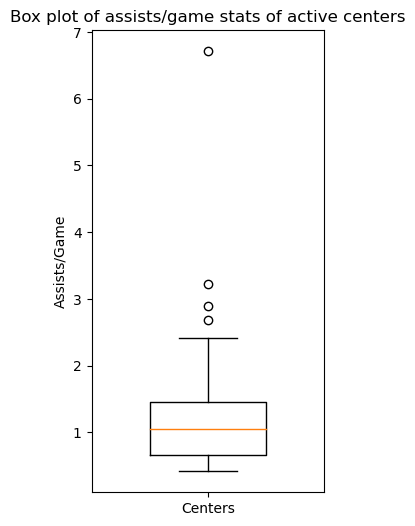

In [32]:
fig = plt.figure(figsize=(3,6))
plt.boxplot(astC, widths=0.5)
plt.xticks([1],['Centers'])
plt.ylabel('Assists/Game')
plt.title('Box plot of assists/game stats of active centers')
plt.show()

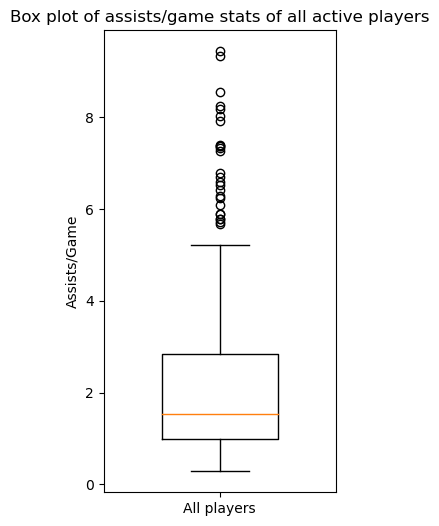

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
3,9.442347,101108,Chris Paul,Guard,182.88,79.378665,67.444444,17.848758,9.442347,4.487565,34.354979
257,9.334337,1629027,Trae Young,Guard,185.42,74.389149,70.600000,25.726564,9.334337,3.712877,33.933537
38,8.554036,202322,John Wall,Guard,190.50,95.254398,58.818182,18.468712,8.554036,4.013593,34.061574
13,8.241895,201566,Russell Westbrook,Guard,190.50,90.718474,68.647059,21.702435,8.241895,7.086293,33.705345
333,8.187631,1630169,Tyrese Haliburton,Guard,195.58,83.914588,53.600000,16.150229,8.187631,3.778417,33.848673
259,8.024506,1629029,Luka Doncic,Forward-Guard,200.66,104.326245,66.000000,27.713421,8.024506,8.588405,34.330364
26,7.923626,201935,James Harden,Guard,195.58,99.790321,61.611111,24.279426,7.923626,6.050061,35.302629
327,7.398344,1630163,LaMelo Ball,Guard,200.66,81.646627,54.000000,19.709847,7.398344,6.339412,32.106492
152,7.374700,1627732,Ben Simmons,Forward-Guard,208.28,108.862169,63.400000,14.074889,7.374700,7.639924,32.392634
288,7.370836,1629630,Ja Morant,Guard,187.96,78.925072,62.000000,22.629903,7.370836,4.854971,32.154326


In [33]:
ast_g = grouped[['AST_G']]

fig = plt.figure(figsize=(3,6))
plt.boxplot(ast_g, widths=0.5)
plt.xticks([1],['All players'])
plt.ylabel('Assists/Game')
plt.title('Box plot of assists/game stats of all active players')
plt.show()

Q1 = np.percentile(ast_g , 25)
Q3 = np.percentile(ast_g , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

outliers = ast_g[(ast_g > upper_limit) | (ast_g < lower_limit)]
outliers = outliers.dropna()
ast_g_outliers = pd.merge(outliers, grouped, left_index=True, right_index=True)
ast_g_outliers.sort_values(by=['AST_G_x'], ascending = False)

In [34]:
astG = guard[['AST_G']]
astG.describe()

,AST_G
count,178.000000
mean,2.966013
std,1.960135
min,0.285714
25%,1.512080
50%,2.505265
75%,3.939216
max,9.442347


In [35]:
Q1 = np.percentile(astG , 25)
Q3 = np.percentile(astG , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

outliers = astG[(astG > upper_limit) | (astG < lower_limit)]
outliers = outliers.dropna()
astG_outliers = pd.merge(outliers, guard, left_index=True, right_index=True)
astG_outliers

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
3,9.442347,101108,Chris Paul,Guard,182.88,79.378665,67.444444,17.848758,9.442347,4.487565,34.354979
13,8.241895,201566,Russell Westbrook,Guard,190.50,90.718474,68.647059,21.702435,8.241895,7.086293,33.705345
26,7.923626,201935,James Harden,Guard,195.58,99.790321,61.611111,24.279426,7.923626,6.050061,35.302629
38,8.554036,202322,John Wall,Guard,190.50,95.254398,58.818182,18.468712,8.554036,4.013593,34.061574
257,9.334337,1629027,Trae Young,Guard,185.42,74.389149,70.600000,25.726564,9.334337,3.712877,33.933537
333,8.187631,1630169,Tyrese Haliburton,Guard,195.58,83.914588,53.600000,16.150229,8.187631,3.778417,33.848673


In [36]:
astFG = forward_guard[['AST_G']]
Q1 = np.percentile(astFG , 25)
Q3 = np.percentile(astFG , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

outliers = astFG[(astFG > upper_limit) | (astFG < lower_limit)]
outliers = outliers.dropna()
astFG_outliers = pd.merge(outliers, forward_guard, left_index=True, right_index=True)
astFG_outliers

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
152,7.374700,1627732,Ben Simmons,Forward-Guard,208.28,108.862169,63.4,14.074889,7.374700,7.639924,32.392634
259,8.024506,1629029,Luka Doncic,Forward-Guard,200.66,104.326245,66.0,27.713421,8.024506,8.588405,34.330364
301,5.095110,1629645,Kevin Porter Jr.,Forward-Guard,193.04,92.079251,49.0,15.311711,5.095110,4.186694,30.240306


In [37]:
astF = forward[['AST_G']]
Q1 = np.percentile(astF , 25)
Q3 = np.percentile(astF , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

outliers = astF[(astF > upper_limit) | (astF < lower_limit)]
outliers = outliers.dropna()
astF_outliers = pd.merge(outliers, forward, left_index=True, right_index=True)
astF_outliers

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
0,7.343041,2544,LeBron James,Forward,205.74,113.398093,71.050000,27.202618,7.343041,7.546615,37.830215
7,4.427705,201142,Kevin Durant,Forward,208.28,108.862169,60.764706,27.306265,4.427705,7.000914,36.173480
25,4.020321,201933,Blake Griffin,Forward,205.74,113.398093,51.117647,17.526074,4.020321,7.149854,30.578517
41,3.604866,202331,Paul George,Forward,203.20,99.790321,61.000000,19.815780,3.604866,6.151568,32.016522
56,4.216533,202710,Jimmy Butler,Forward,200.66,104.326245,58.500000,18.225218,4.216533,5.284743,32.854648
68,5.780811,203110,Draymond Green,Forward,198.12,104.326245,68.909091,8.580728,5.780811,6.960750,28.932074
69,3.762108,203114,Khris Middleton,Forward,200.66,100.697506,62.181818,16.292973,3.762108,4.643261,30.169176
93,4.790429,203507,Giannis Antetokounmpo,Forward,213.36,110.222946,71.900000,23.245658,4.790429,9.798320,32.480448
157,4.199290,1627742,Brandon Ingram,Forward,203.20,86.182550,59.000000,19.811399,4.199290,5.253167,33.223156
169,3.489361,1627783,Pascal Siakam,Forward,203.20,104.326245,67.285714,17.085937,3.489361,6.518453,30.635507


In [38]:
astFC = forward_center[['AST_G']]
Q1 = np.percentile(astFC , 25)
Q3 = np.percentile(astFC , 75)

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

outliers = astFC[(astFC > upper_limit) | (astFC < lower_limit)]
outliers = outliers.dropna()
astFC_outliers = pd.merge(outliers, forward_center, left_index=True, right_index=True)
astFC_outliers

,AST_G_x,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,PTS_G,AST_G_y,REB_G,MIN_G
8,3.236904,201143,Al Horford,Forward-Center,205.74,108.862169,63.312500,13.528815,3.236904,7.912737,31.885477
112,3.265992,203944,Julius Randle,Forward-Center,203.20,113.398093,66.111111,16.994068,3.265992,8.367902,29.917540
114,3.299361,203954,Joel Embiid,Forward-Center,213.36,127.005864,56.285714,26.536943,3.299361,10.921992,31.191272
128,3.471370,1626157,Karl-Anthony Towns,Forward-Center,213.36,112.490908,63.875000,23.212303,3.471370,10.852154,33.970669
153,4.543935,1627734,Domantas Sabonis,Forward-Center,215.90,108.862169,61.777778,16.247466,4.543935,10.428387,30.849720
201,3.469648,1628389,Bam Adebayo,Forward-Center,205.74,115.666054,69.666667,14.980196,3.469648,8.534741,29.573077


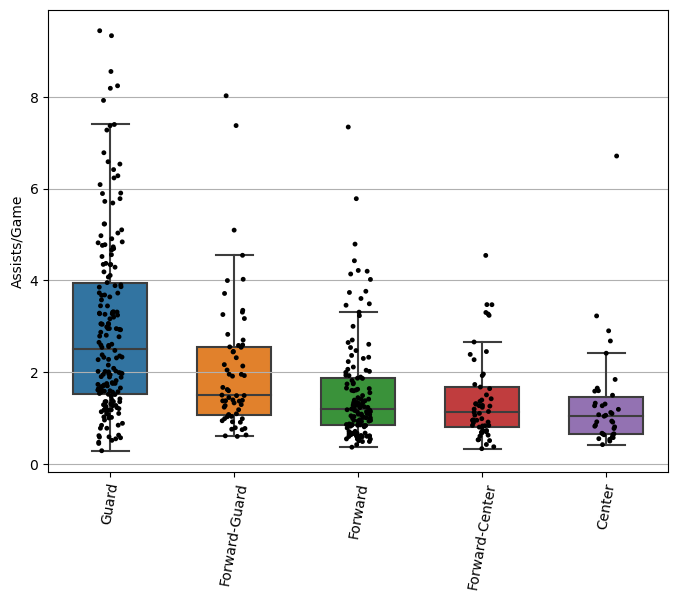

In [39]:
statMeanOrder = list(grouped.groupby("POSITION").mean()["AST_G"].sort_values(ascending = False).index)

fig = plt.figure(figsize=(8,6))
sns.boxplot(data = grouped, x = "POSITION", y = "AST_G", width = 0.6, showfliers = False, order=statMeanOrder)
sns.stripplot(data = grouped, x = "POSITION", y = "AST_G", dodge=True, s = 3.5, color = "black", order = statMeanOrder)
plt.xticks(rotation = 80, fontsize = 10)
plt.ylabel('Assists/Game')
plt.xlabel('')
plt.grid(axis = "y")
plt.show()

### Analysis of outliers for points / game per positions

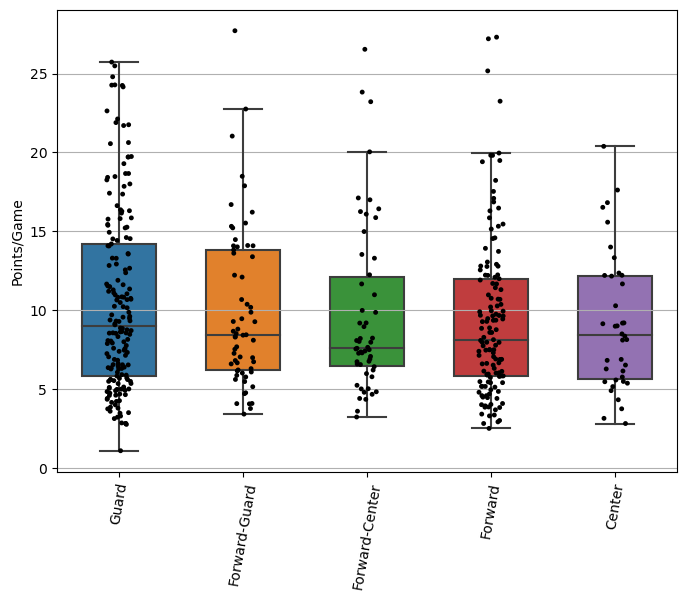

In [40]:
statMeanOrder = list(grouped.groupby("POSITION").mean()["PTS_G"].sort_values(ascending = False).index)

fig = plt.figure(figsize=(8,6))
sns.boxplot(data = grouped, x = "POSITION", y = "PTS_G", width = 0.6, showfliers = False, order=statMeanOrder)
sns.stripplot(data = grouped, x = "POSITION", y = "PTS_G", dodge=True, s = 3.5, color = "black", order = statMeanOrder)
plt.xticks(rotation = 80, fontsize = 10)
plt.ylabel('Points/Game')
plt.xlabel('')
plt.grid(axis = "y")
plt.show()

### Analysis of outliers for rebounds / game per positions

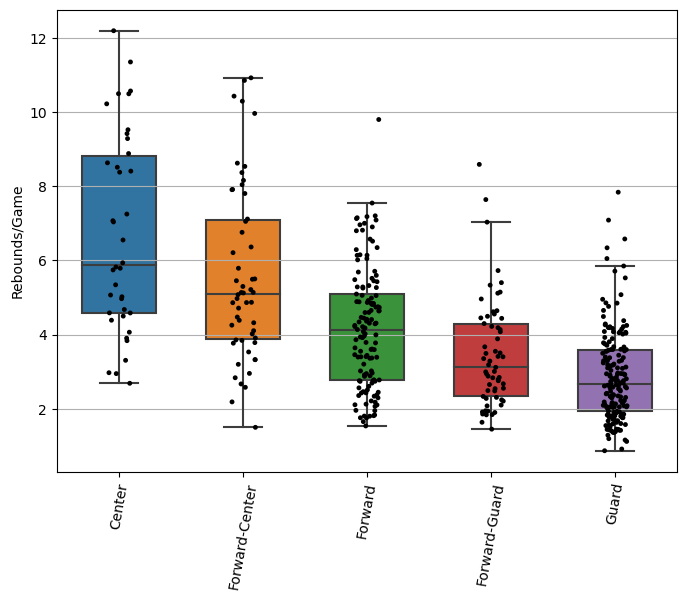

In [41]:
statMeanOrder = list(grouped.groupby("POSITION").mean()["REB_G"].sort_values(ascending = False).index)

fig = plt.figure(figsize=(8,6))
sns.boxplot(data = grouped, x = "POSITION", y = "REB_G", width = 0.6, showfliers = False, order=statMeanOrder)
sns.stripplot(data = grouped, x = "POSITION", y = "REB_G", dodge=True, s = 3.5, color = "black", order = statMeanOrder)
plt.xticks(rotation = 80, fontsize = 10)
plt.ylabel('Rebounds/Game')
plt.xlabel('')
plt.grid(axis = "y")
plt.show()

### Visualize P/G, A/G and R/G on a 3D scatter plot

In [42]:
#to enable interactivity on 3d scatter plot
#%matplotlib notebook
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d

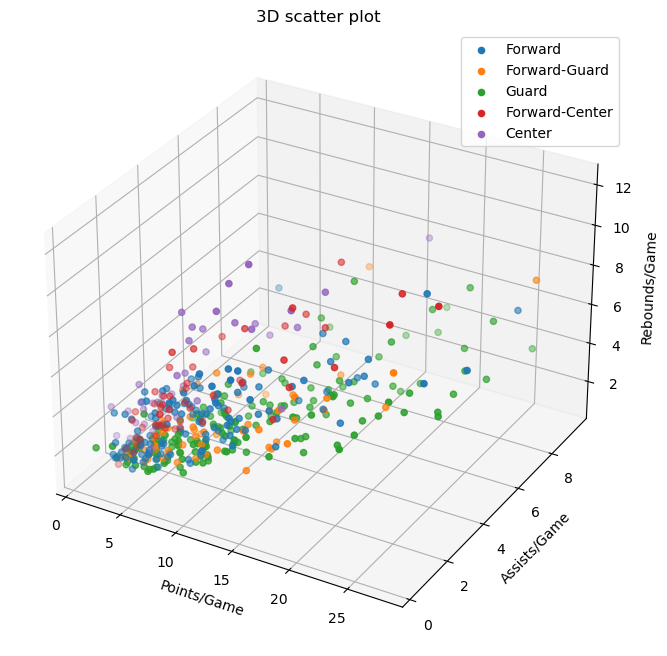

In [43]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
for s in grouped.POSITION.unique():
    ax.scatter(grouped.PTS_G[grouped.POSITION==s],grouped.AST_G[grouped.POSITION==s],grouped.REB_G[grouped.POSITION==s],label=s)
ax.legend()
plt.title("3D scatter plot")
plt.xlabel('Points/Game')
plt.ylabel('Assists/Game')
ax.set_zlabel('Rebounds/Game')
plt.show()

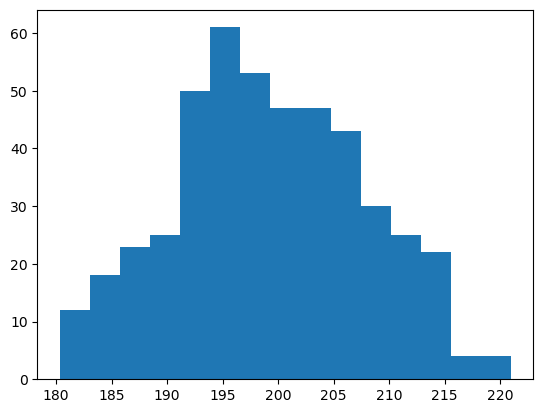

In [44]:
#histogram of the height distribution of active players
x=grouped['HEIGHT_CM']
plt.hist(x, bins=15)
plt.show()

### Export to CSV file

In [45]:
data.to_csv('data.csv')